In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [46]:
df = pd.read_csv("student_data.csv")
display(df.head())
cols = df.columns
df_selected = df[["GPA","study_hours","attendance_rate"]]
display(df_selected.head())

,student_id,GPA,study_hours,attendance_rate
0,S001,3.25,4.8,78.6
1,S002,2.93,7.7,80.6
2,S003,3.32,8.0,85.8
3,S004,3.76,6.6,85.5
4,S005,2.88,8.5,61.2


,GPA,study_hours,attendance_rate
0,3.25,4.8,78.6
1,2.93,7.7,80.6
2,3.32,8.0,85.8
3,3.76,6.6,85.5
4,2.88,8.5,61.2


[]

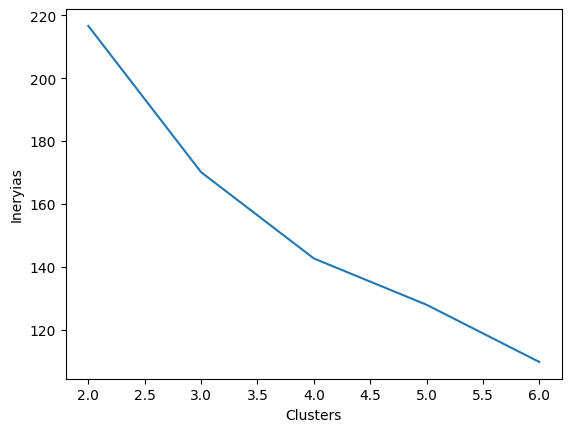

In [47]:
ss =StandardScaler()
df_scaled = ss.fit_transform(df_selected)
inertias =[]
for i in range(2,7):
    km = KMeans(n_clusters=i,init="k-means++",random_state=42)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

plt.plot(range(2,7),inertias)
plt.xlabel("Clusters")
plt.ylabel("Ineryias")
plt.plot() 


In [48]:

df_scaled = pd.DataFrame(df_scaled,columns=["GPA","study_hours","attendance_rate"])
km = KMeans(n_clusters=4,init="k-means++",random_state=42)
km.fit(df_scaled)
pred = km.predict(df_scaled)
df_scaled["Clusters"] = pred

display(df_scaled)

,GPA,study_hours,attendance_rate,Clusters
0,0.667584,-1.498338,0.296147,3
1,-0.040728,-0.480731,0.492662,3
2,0.822528,-0.375462,1.003599,3
3,1.796457,-0.866720,0.974122,3
4,-0.151402,-0.200012,-1.413529,2
...,...,...,...,...
95,-1.501622,0.396516,-0.735554,0
96,0.446237,-0.971990,0.826736,3
97,0.401967,0.150886,0.247019,3
98,0.114215,0.045617,0.738305,3


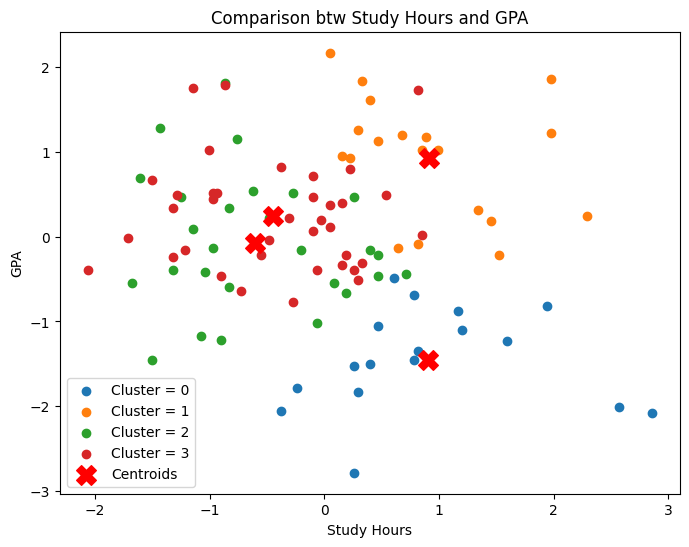

In [49]:
plt.figure(figsize=(8, 6))
for i in range(4):
    cluster_point = df_scaled[df_scaled["Clusters"] == i]
    plt.scatter(cluster_point.iloc[:,1],cluster_point.iloc[:,0],label = f"Cluster = {i}")
    
plt.scatter(
    km.cluster_centers_[:, 1],
    km.cluster_centers_[:, 0],
    s=200,
    c="red",
    marker="X",
    label="Centroids"
)
plt.title("Comparison btw Study Hours and GPA")
plt.xlabel("Study Hours")
plt.ylabel("GPA")
plt.legend()
plt.show()

In [50]:
df_scaled["StudentId"] = df["student_id"]
df_scaled.set_index("StudentId")
display(df_scaled)

,GPA,study_hours,attendance_rate,Clusters,StudentId
0,0.667584,-1.498338,0.296147,3,S001
1,-0.040728,-0.480731,0.492662,3,S002
2,0.822528,-0.375462,1.003599,3,S003
3,1.796457,-0.866720,0.974122,3,S004
4,-0.151402,-0.200012,-1.413529,2,S005
...,...,...,...,...,...
95,-1.501622,0.396516,-0.735554,0,S096
96,0.446237,-0.971990,0.826736,3,S097
97,0.401967,0.150886,0.247019,3,S098
98,0.114215,0.045617,0.738305,3,S099
